## Descrição da base de dados

O dataset, intitulado "Data Science Job Salaries," contém informações sobre os salários de diferentes cargos na área de ciência de dados. Ele oferece uma visão abrangente de como as remunerações variam com base em diferentes fatores, como o nível de experiência, tipo de emprego, localização do empregado e da empresa, e a quantidade de trabalho remoto.

Sobre o Dataset

| Column |  Description |
|----------|----------|
| work_year | The year the salary was paid. |
| experience_level | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director |
| employment_type | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance |
| job_title | The role worked in during the year. |
| salary | The total gross salary amount paid. |
| salary_currency | The currency of the salary paid as an ISO 4217 currency code. |
| salary_in_usd | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com). |
| employee_residence | The year the salary was paid. |
| remote_ratio |  The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%) |
| company_location | The country of the employer's main office or contracting branch as an ISO 3166 country code. |
| company_size |The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large) |

___

## Perguntas para a análise exploratória:

**Salários**

*Distribuição salarial:*
- Qual a distribuição salarial média por nível de experiência?
- Como os salários variam por tipo de emprego (full-time, part-time, etc.)?
- Qual a relação entre salário e tamanho da empresa?
- Existe uma diferença significativa nos salários entre diferentes locais de trabalho?

*Desvios salariais:*
- Qual a amplitude salarial para cada cargo?
- Existem outliers salariais? Se sim, o que eles podem indicar?

*Impacto da moeda:*
- Como a conversão para dólares afeta a comparação de salários entre diferentes países?
- Existe uma correlação entre o salário em moeda local e o salário em dólares?

**Cargos e Experiência**

*Cargos mais comuns:*
- Quais são os cargos mais comuns no dataset?
- Como a demanda por diferentes cargos varia ao longo dos anos?

*Progressão de carreira:*
- Qual a relação entre o nível de experiência e o cargo?
- Existe uma progressão de carreira típica nesse dataset?

*Habilidades em alta:*
- Analisando os títulos dos cargos, quais habilidades são mais demandadas?

**Localização e Tamanho da empresa**

*Mercado de trabalho por região:*
- Quais regiões oferecem os salários mais altos?

*Tamanho x Salário*
- As grandes empresas pagam salários mais altos?
- Qual o tipo de cargo mais comum em empresas de cada tamanho?

___

Itens a verificar:

01. Dados vazios - OK
02. Retirar as colunas redundantes: salary e salary_currency - Apresentar a base original e na sequencia fazer a exclusão delas explicando o motivo dessa decisão.
03. Incluir 2 colunas: salário em real (anual) e salario em real (valor mensal). Valor da média da moeda USD no ano de referência.
04. Contagem de work_year
05. Contagem employeee_residence
06. Contagem company_location
07. Contagem company_size
08. Média salarial por employee_residence
09. Media salarial company_location
10. Contagem job_title - OK
11. Contagem experience_level - OK
12. Fazer uma analise de outliers para verificar quais cargos possuem maior e menor salários, porque alguns podem estar enquadrados nos outliers.

___

## Pré-Processamento dos dados

Instalação das bibliotecas

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importação do Dataset

In [18]:
df = pd.read_csv("./ds_salaries.csv")
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [19]:
df.shape

(607, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [21]:
df.dtypes

,0
Unnamed: 0,int64
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64


**Exclusão de colunas do Dataset**

As colunas "Unnamed: 0', 'salary' e 'salary_currency'" foram excluidas do Dataset por apresentarem dados desnecessários ou redundantes. Estão ação foi realizada por questões de exercício, pensando em um Dataset grande, essas colunas a mais poderiam consumir mais tempo de processamento dos dados.



In [22]:
df = df.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis = 1)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


Criando novas colunas "anual_salary_brl" e "monthly_salary_brl" para análise dos salários em Real com base no câmbio da época.

In [23]:
exchange_rates = {2020: 5.16,
                  2021: 5.39,
                  2022: 5.17}
df['anual_salary_brl'] = df.apply(lambda row: row['salary_in_usd'] * exchange_rates[row['work_year']], axis=1)
df['monthly_salary_brl'] = df.apply(lambda row: row['anual_salary_brl'] / 12, axis=1).round(2)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,411938.28,34328.19
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,1341600.00,111800.00
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,562563.84,46880.32
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,103200.00,8600.00
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,774000.00,64500.00
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M,796180.00,66348.33
603,2022,SE,FT,Data Engineer,126000,US,100,US,M,651420.00,54285.00
604,2022,SE,FT,Data Analyst,129000,US,0,US,M,666930.00,55577.50
605,2022,SE,FT,Data Analyst,150000,US,100,US,M,775500.00,64625.00


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,0.692133,2020.00,2021.000,2022.00,2022.00,2022.0
salary_in_usd,607.0,112297.869852,70957.259411,2859.00,62726.000,101570.00,150000.00,600000.0
remote_ratio,607.0,70.922570,40.709130,0.00,50.000,100.00,100.00,100.0
anual_salary_brl,607.0,588319.747759,372753.046448,15410.01,333899.720,539000.00,782634.60,3234000.0
monthly_salary_brl,607.0,49026.645552,31062.753895,1284.17,27824.975,44916.67,65219.55,269500.0


### EDA

### Analise dos trabalhos

Quais são os cargos com mais profissionais na área de dados?

In [25]:
df['job_title'].value_counts()


,count
job_title,
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16
Data Science Manager,12
Data Architect,11
Big Data Engineer,8
Machine Learning Scientist,8


Quantos cargos diferentes temos na base toda?

In [26]:
df['job_title'].nunique()

50

Aqui estão o Top 10 cargos com mais profissionais respondentes da pesquisa.

In [27]:
jobs = df.groupby('job_title').size().reset_index().sort_values(by=0,ascending = False)
jobs.head(10)

,job_title,0
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16
21,Data Science Manager,12
16,Data Architect,11
7,Big Data Engineer,8
41,Machine Learning Scientist,8
25,Director of Data Science,7


In [28]:
df['company_location'].value_counts()

,count
company_location,
US,355
GB,47
CA,30
DE,28
IN,24
FR,15
ES,14
GR,11
JP,6


In [29]:
df['company_size'].value_counts()

,count
company_size,
M,326
L,198
S,83


In [30]:
df['experience_level'].value_counts()

,count
experience_level,
SE,280
MI,213
EN,88
EX,26


In [31]:
df['work_year'].value_counts()

,count
work_year,
2022,318
2021,217
2020,72


In [32]:
df['employment_type'].value_counts()

,count
employment_type,
FT,588
PT,10
CT,5
FL,4


<ipython-input-33-bb2c6972827c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='job_title',y=0,data = jobs[:10],palette = 'deep')


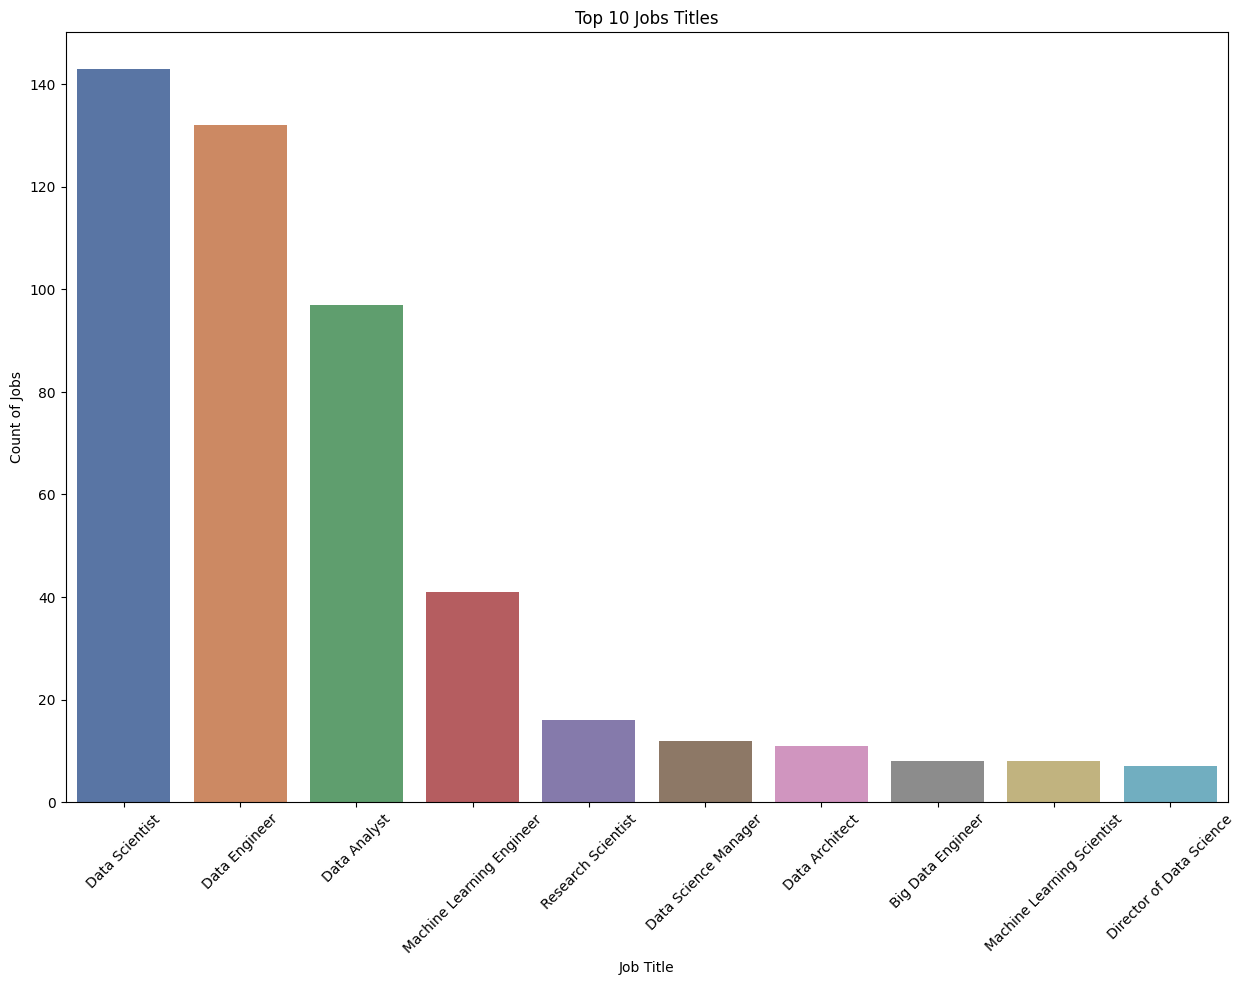

In [33]:
plt.figure(figsize=(15, 10))
sns.barplot(x='job_title',y=0,data = jobs[:10],palette = 'deep')
plt.title('Top 10 Jobs Titles')
plt.xlabel('Job Title')
plt.ylabel('Count of Jobs')
plt.xticks(rotation=45)
plt.show()

OBSERVAÇÕES:

Foi possivel perceber que do top 10 vagas que mais tem profissionais neste dataset os que mais se destacam é os Data Scientist, Data Engineer e Data Analyst.

### Qual o grau de Senioridade dos profissionais de dados?

In [34]:
levels = df.experience_level.value_counts()
levels

,count
experience_level,
SE,280
MI,213
EN,88
EX,26


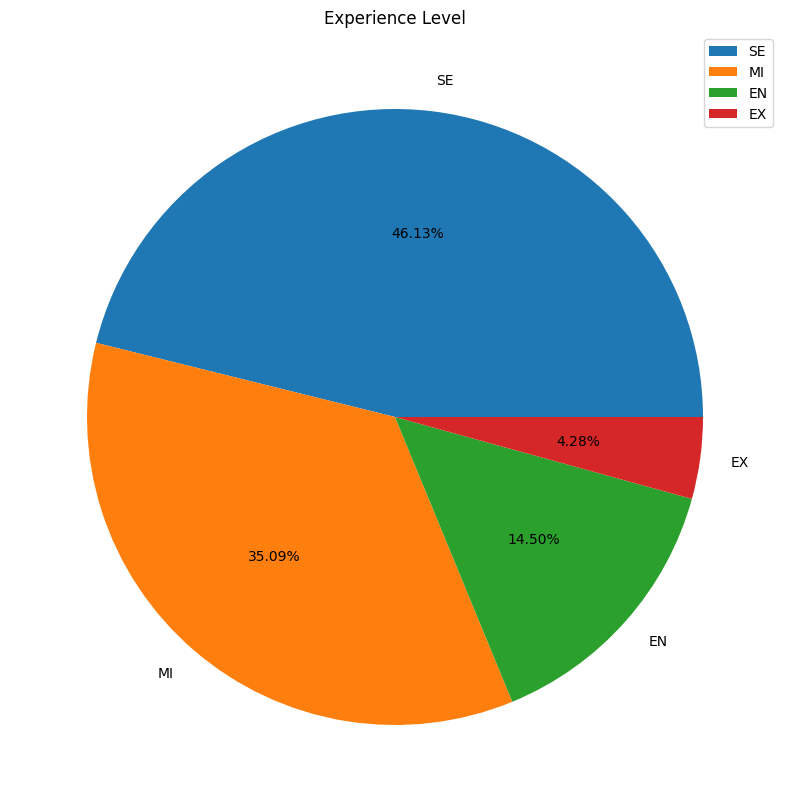

In [35]:
plt.figure(figsize=(15, 10))
plt.pie(x = levels.values,labels =levels.index,autopct='%1.2f%%')
plt.title('Experience Level')
plt.legend()
plt.show()

Observação:

Com a análise desse gráfico se nota uma maior participação de profissionais seniores

Distribuição salarial:

Qual a distribuição salarial média por nível de experiência?
Como os salários variam por tipo de emprego (full-time, part-time, etc.)?
Qual a relação entre salário e tamanho da empresa?
Existe uma diferença significativa nos salários entre diferentes locais de trabalho?

In [53]:
# Qual a distribuição salarial média por nível de experiência?
salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().round(2).reset_index()
salary_by_experience

,experience_level,salary_in_usd
0,EN,61643.32
1,EX,199392.04
2,MI,87996.06
3,SE,138617.29


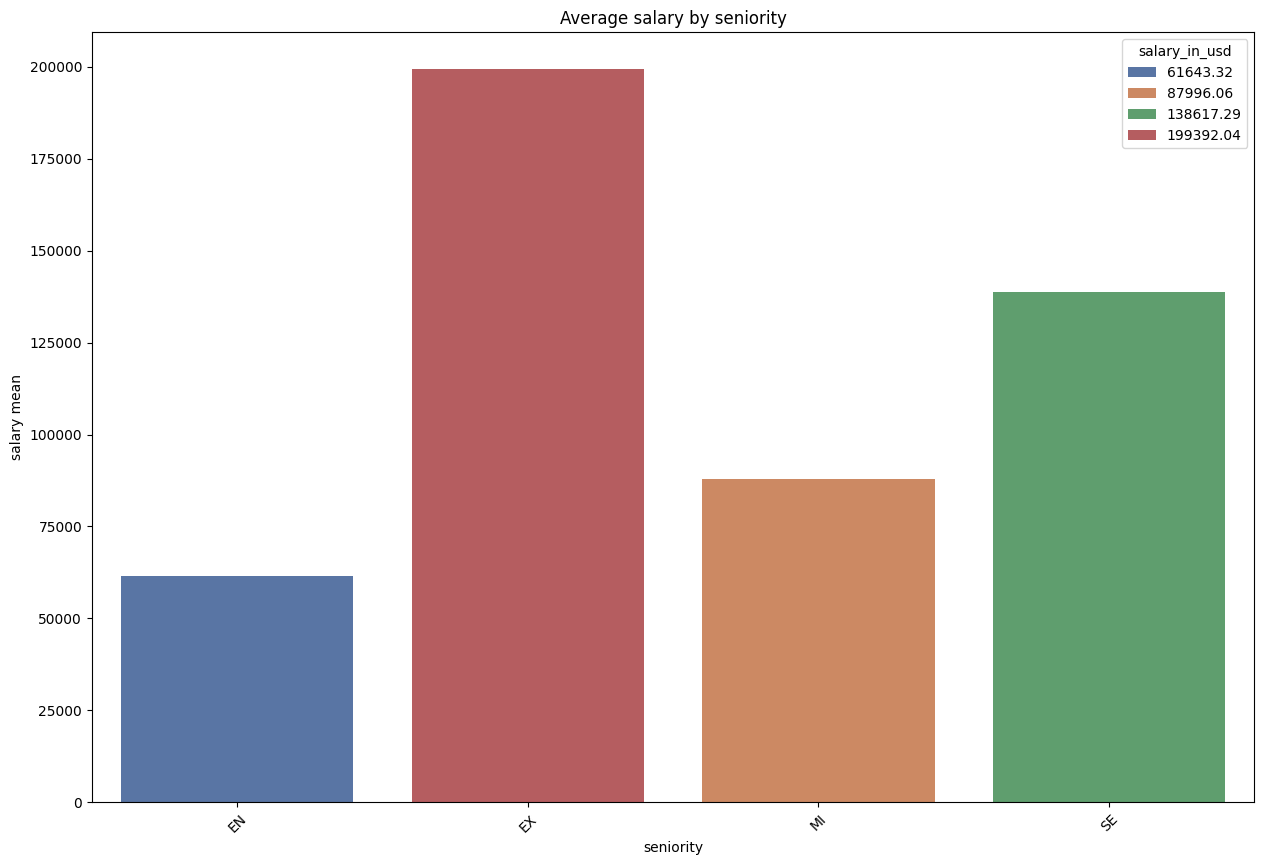

In [56]:
plt.figure(figsize=(15, 10))
sns.barplot(x='experience_level', y='salary_in_usd', hue = 'salary_in_usd',data = salary_by_experience, palette = 'deep')
plt.title('Average salary by seniority')
plt.xlabel('seniority')
plt.ylabel('salary mean')
plt.xticks(rotation=45)
plt.show()

Observações:

É possível notar que quanto maior a especialização do profissional mais ele tende a receber um salário maior

In [57]:
#Como os salários variam por tipo de emprego (full-time, part-time, etc.)?
salary_by_employment_type = df.groupby('employment_type')['salary_in_usd'].mean().round(2).reset_index()
salary_by_employment_type

,employment_type,salary_in_usd
0,CT,184575.00
1,FL,48000.00
2,FT,113468.07
3,PT,33070.50


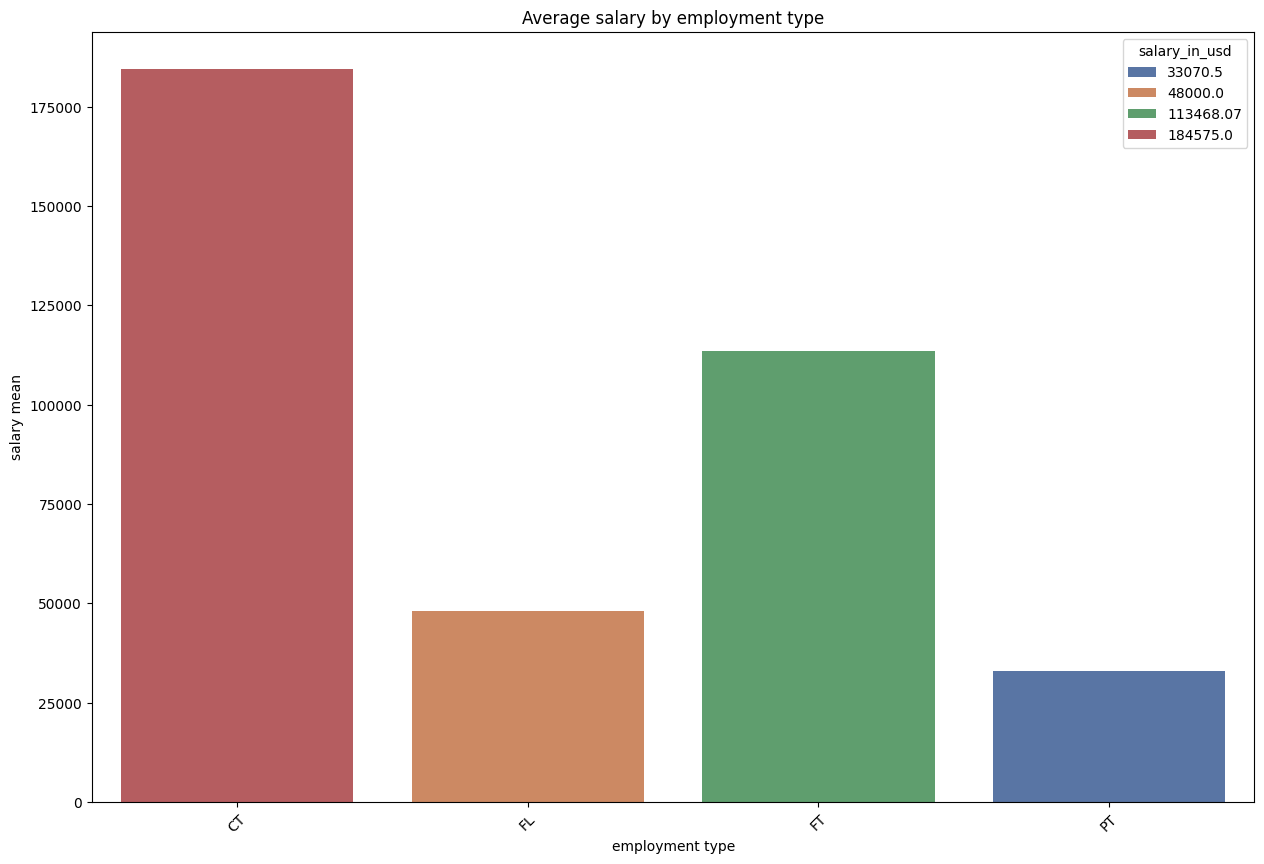

In [59]:
plt.figure(figsize=(15, 10))
sns.barplot(x='employment_type', y='salary_in_usd', hue = 'salary_in_usd',data = salary_by_employment_type, palette = 'deep')
plt.title('Average salary by employment type')
plt.xlabel('employment type')
plt.ylabel('salary mean')
plt.xticks(rotation=45)
plt.show()

Observações:

É possível notar que a maioria dos profissionais atuam por contrato ou atuam no emprego por tempo integral

In [60]:
# Qual a relação entre salário e tamanho da empresa?
salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean().round(2).reset_index()
salary_by_company_size

,company_size,salary_in_usd
0,L,119242.99
1,M,116905.47
2,S,77632.67


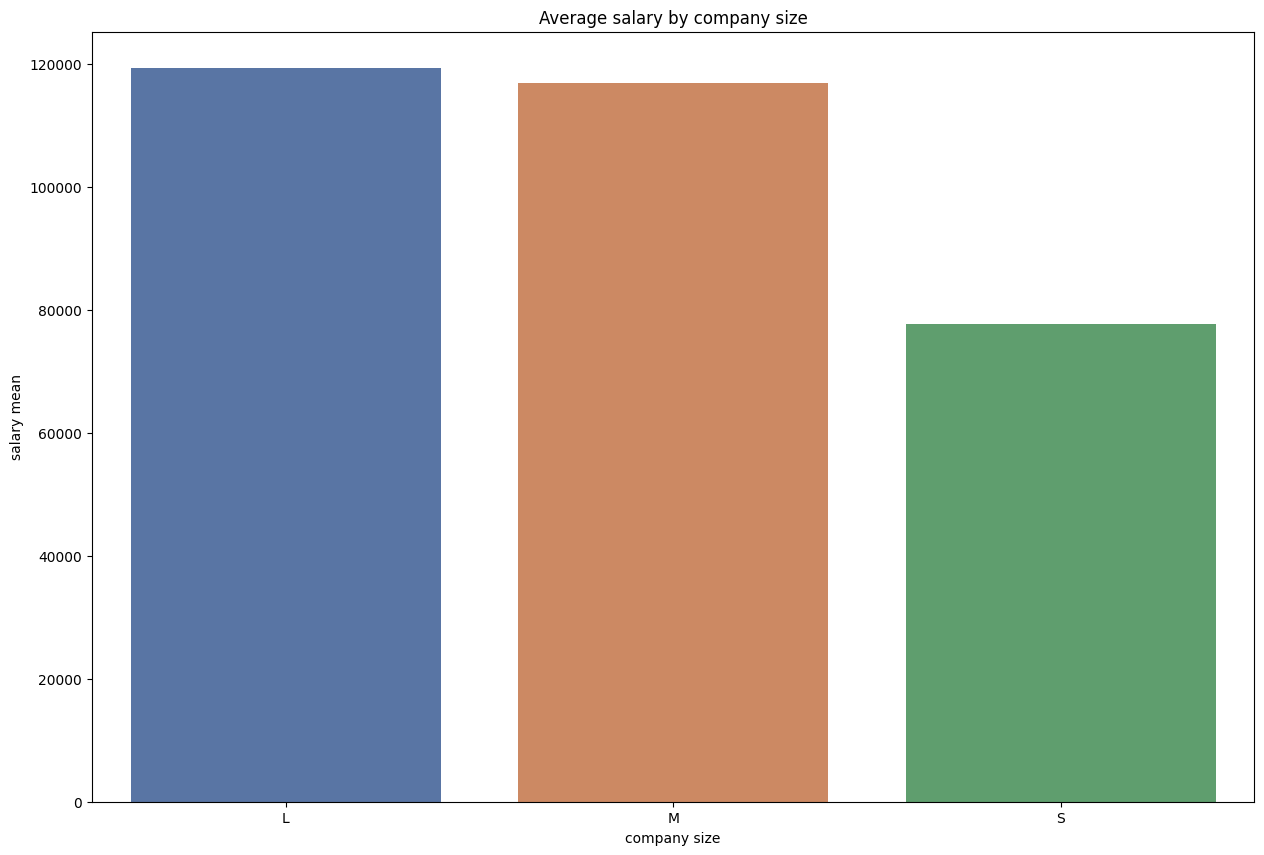

In [67]:
plt.figure(figsize=(15, 10))
sns.barplot(x='company_size', y='salary_in_usd', hue = 'company_size',data = salary_by_company_size, palette = 'deep')
plt.title('Average salary by company size')
plt.xlabel('company size')
plt.ylabel('salary mean')
plt.show()

Observações:

Não é possível notar uma diferença substancial entre o salario médio entre empresas grande e média

In [73]:
#Existe uma diferença significativa nos salários entre diferentes paises de trabalho?
# Agrupa e calcula a média dos salários por país
salary_by_company_location = df.groupby('company_location')['salary_in_usd'].mean().round(2).reset_index()

# Organiza o DataFrame do maior para o menor salário
salary_by_company_location_sorted = salary_by_company_location.sort_values(by='salary_in_usd', ascending=False)

salary_by_company_location_sorted

,company_location,salary_in_usd
43,RU,157500.00
48,US,144055.26
38,NZ,125000.00
24,IL,119059.00
29,JP,114127.33
3,AU,108042.67
0,AE,100000.00
14,DZ,100000.00
26,IQ,100000.00
6,CA,99823.73


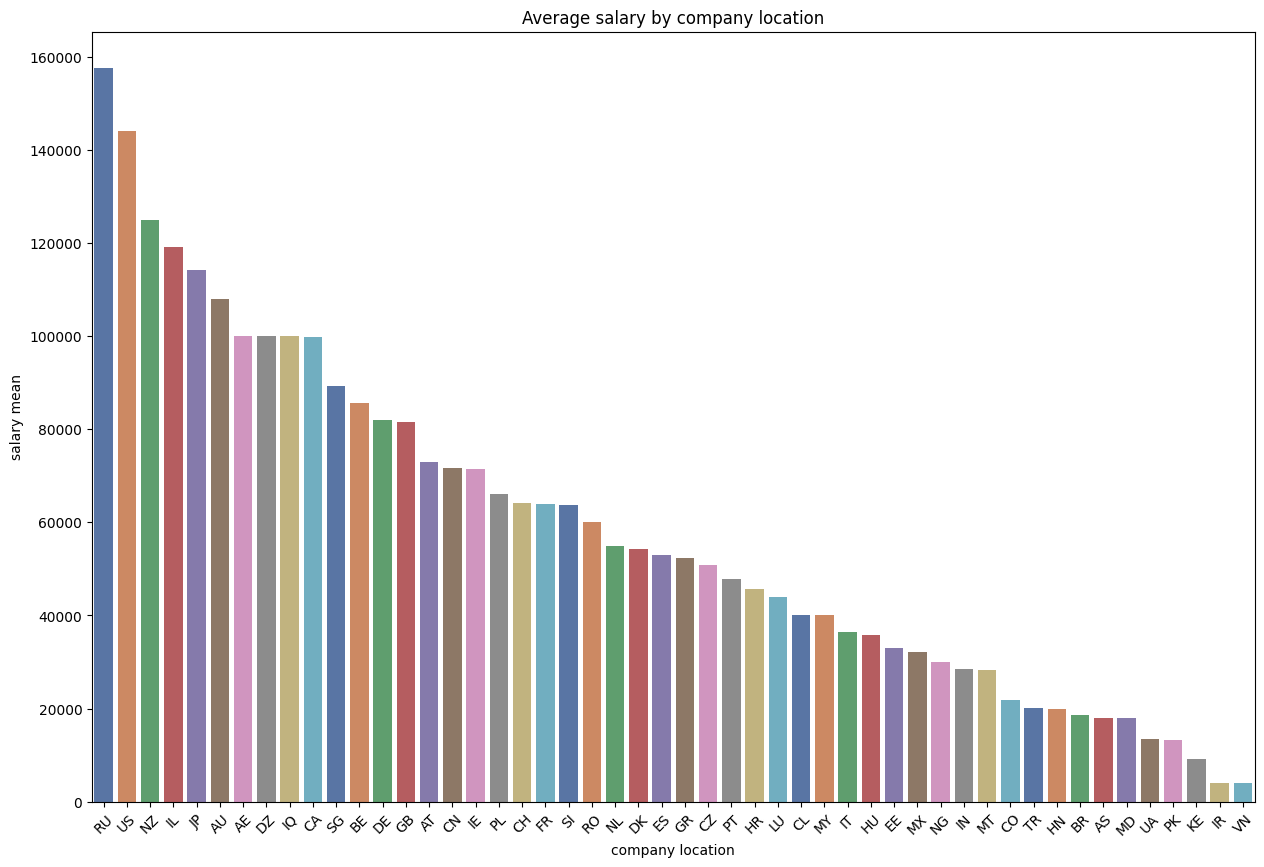

In [74]:
plt.figure(figsize=(15, 10))
sns.barplot(x='company_location', y='salary_in_usd', hue = 'company_location',data = salary_by_company_location_sorted, palette = 'deep')
plt.title('Average salary by company location')
plt.xlabel('company location')
plt.ylabel('salary mean')
plt.xticks(rotation=45)
plt.show()

Observações:

Possível notar que a Rússia recebe mais salário em média, porém eles apenas possui 2 profissionais cadastrados no dataset

Desvios salariais:

Qual a amplitude salarial para cada cargo?
Existem outliers salariais? Se sim, o que eles podem indicar?

In [89]:
#Qual a amplitude salarial para cada cargo?
salary_range_by_job = df.groupby('job_title')['salary_in_usd'].agg(lambda x: x.max() - x.min()).reset_index().sort_values(by='salary_in_usd', ascending=False)

# Renomear a coluna
salary_range_by_job.columns = ['job_title', 'salary_range']

# Exibir o resultado
salary_range_by_job

,job_title,salary_range
45,Principal Data Engineer,415000
22,Data Scientist,409141
48,Research Scientist,408000
4,Applied Machine Learning Scientist,391125
28,Financial Data Analyst,350000
3,Applied Data Scientist,325762
17,Data Engineer,320000
46,Principal Data Scientist,267739
36,ML Engineer,254034
41,Machine Learning Scientist,248000


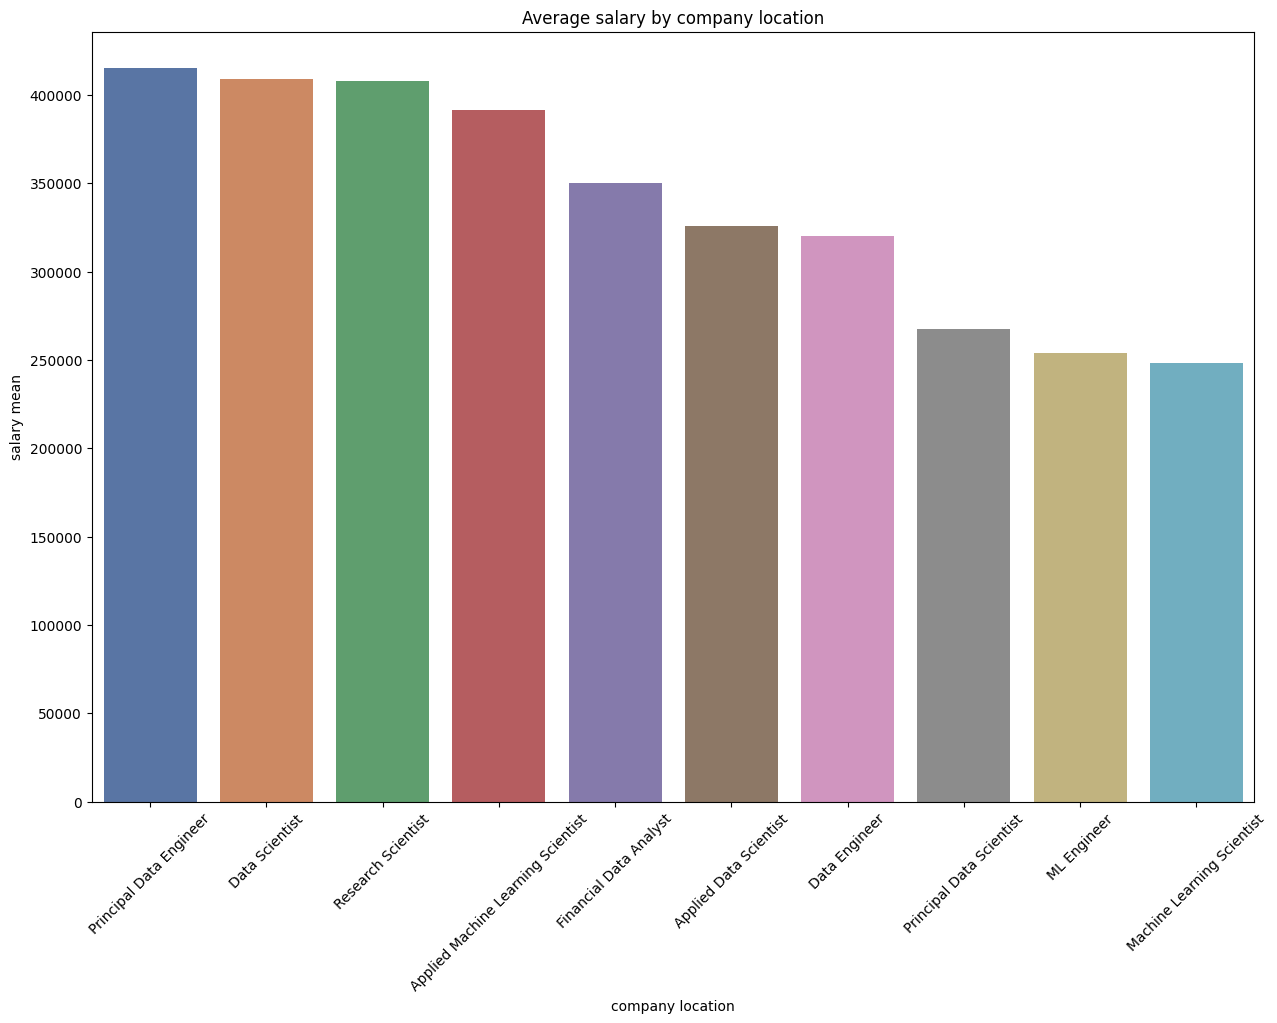

In [90]:
plt.figure(figsize=(15, 10))
sns.barplot(x='job_title', y='salary_range', hue = 'job_title',data = salary_range_by_job[:10], palette = 'deep')
plt.title('Average salary by company location')
plt.xlabel('company location')
plt.ylabel('salary mean')
plt.xticks(rotation=45)
plt.show()

In [91]:
# Definir uma função para detectar outliers com base no IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detectar outliers salariais para cada cargo
outliers_by_job = df.groupby('job_title').apply(lambda group: detect_outliers_iqr(group, 'salary_in_usd'))

# Exibir os outliers
print(outliers_by_job)

                                        work_year experience_level  \
job_title                                                            
AI Scientist                       606       2022               MI   
Applied Data Scientist             519       2022               SE   
Applied Machine Learning Scientist 157       2021               MI   
Computer Vision Engineer           454       2022               EN   
Data Analyst                       233       2021               SE   
Data Engineer                      482       2022               EX   
Data Science Consultant            18        2020               EN   
Data Science Manager               141       2021               SE   
                                   198       2021               SE   
                                   421       2022               MI   
Data Scientist                     63        2020               SE   
Lead Data Engineer                 93        2021               SE   
Principal Data Scien

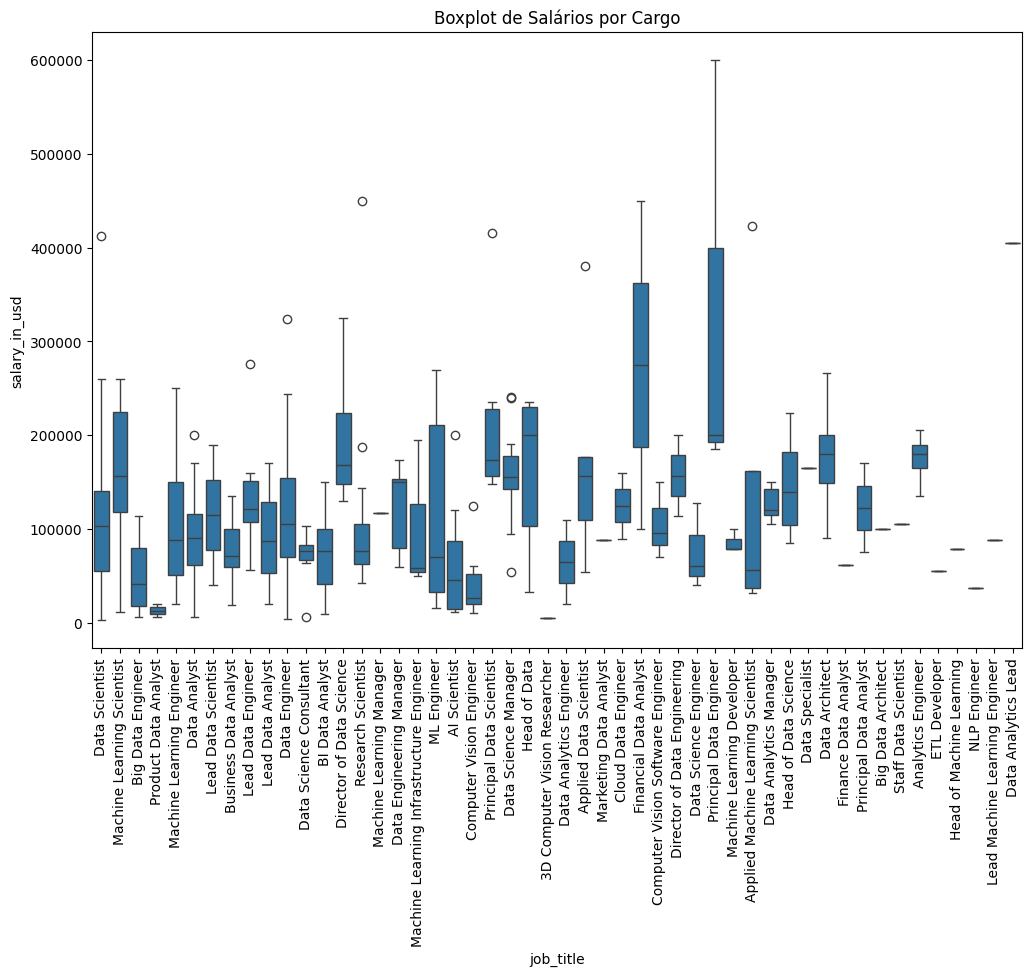

In [92]:
# Criar um boxplot para visualizar os salários por cargo
plt.figure(figsize=(12, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=df)
plt.xticks(rotation=90)  # Rotaciona os nomes dos cargos para melhor visualização
plt.title('Boxplot de Salários por Cargo')
plt.show()

Impacto da moeda:

Como a conversão para dólares afeta a comparação de salários entre diferentes países?

A conversão de salários de moedas locais para dólares nem sempre pode representar uma informação distorcida a cerca da qualidade de vida do profissional, as taxas de câmbio flutuam frequentemente e podem não refletir o real poder de compra da moeda em seu país de origem, salários em países com moedas mais fracas podem parecer baixos quando convertidos para dólares, mas podem proporcionar um poder de compra adequado na economia local, como é o caso por exemplo no Brasil e também mesmo que um salário em dólares seja menor em um país, o custo de vida mais baixo pode compensar essa diferença, como solução, para uma comparação mais precisa entre salários, seria mais adequado utilizar medidas como o Poder de Compra Relativo (PPP - Purchasing Power Parity), que considera o custo de vida local, ao invés de apenas usar taxas de câmbio convencionais.